<font color=gray>MAR 23rd, 2022</font>

**Medrano, Giovanni**

**R11521018**


# <font color=darkred>Laboratory 22: "Reject it or Fail!" or a Lab on "Hypothesis Testing" </font>

In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-6HAS1BN
desktop-6has1bn\medra
C:\Users\medra\anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


**Medrano, Giovanni**

**R11521018**
## Date: 7/27/2022

#### Remember where we left our last laboratory session? 

![](https://media.tumblr.com/tumblr_mbui1kpPoU1rxdw8g.gif)


#### Accept my gratitude if you do! But in case you saw Agent K and Agent J sometime after Thursday or for any other reason, do not recall it, here is where were we left things:
#### We had a dataset with two sets of numbers (Set 1 and Set2). We did a bunch of stuff and decided that the Normal Distribution Data Model provides a good fit for both of sample sets. We, then used the right parameters for Normal Data Model (mean and standard deviation) to generate one new sample set based on each set. We then looked at the four sets next to each other and asked a rather simple question: Are these sets different or similar?
#### While we reached some assertions based on visual assessment, we did not manage to solidify our assertation in any numerical way. Well, now is the time! 

In [4]:
#Load the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Previously ...
data = pd.read_csv("hypothesis_lab_data.csv") 
set1 = np.array(data['Set1'])
set2 = np.array(data['Set2'])
mu1 = set1.mean()
sd1 = set1.std()
mu2 = set2.mean()
sd2 = set2.std()
set1_s = np.random.normal(mu1, sd1, 100)
set2_s = np.random.normal(mu2, sd2, 100)
data2 = pd.DataFrame({'Set1s':set1_s,'Set2s':set2_s})


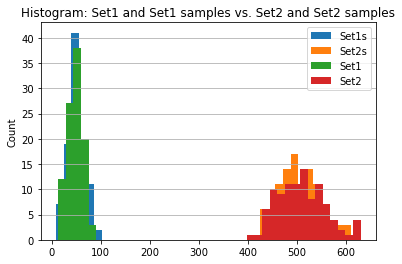

In [6]:
#Previously ...
fig, ax = plt.subplots()
data2.plot.hist(density=False, ax=ax, title='Histogram: Set1 and Set1 samples vs. Set2 and Set2 samples', bins=40)
data.plot.hist(density=False, ax=ax, bins=40)

ax.set_ylabel('Count')
ax.grid(axis='y')

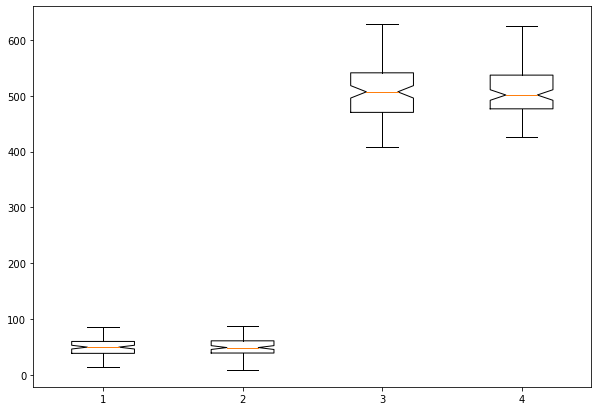

In [7]:
#Previously ...
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot ([set1, set1_s, set2, set2_s],1, '')
plt.show()

__We can use statistical hypothesis tests to confirm that our sets are from Normal Distribution Data Models. We can use the Shapiro-Wilk Normality Test:__

In [12]:
# the Shapiro-Wilk Normality Test for set1
from scipy.stats import shapiro

stat, p = shapiro(data['Set1'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.992, p=0.793
Probably Gaussian


In [13]:
# the Shapiro-Wilk Normality Test for set2
from scipy.stats import shapiro

stat, p = shapiro(data['Set2'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.981, p=0.151
Probably Gaussian


__Now let's confirm that set1 and set1_s are from the same distribution. We can use the Mann-Whitney U Test for this:__

In [14]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data['Set1'],data2['Set1s'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=4830.000, p-value at rejection =0.339
Probably the same distribution


__Let's also confirm that set2 and set2_s are from the same distribution:__

In [15]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data['Set2'],data2['Set2s'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=4972.000, p-value at rejection =0.473
Probably the same distribution


__Based on the results we can say set1 and set1_s probably belong to the same distrubtion. The same can be stated about set2 and set2_s. Now let's check and see if set1 and set2 are SIGNIFICANTLY different or not?__

In [16]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data['Set1'],data['Set2'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=0.000, p-value at rejection =0.000
Probably different distributions


__The test's result indicate that the set1 and set2 belong to distirbutions with different measures of central tendency (means). We can check the same for set1_s and set2_s as well:__

In [17]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data2['Set1s'],data2['Set2s'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=0.000, p-value at rejection =0.000
Probably different distributions


__Now we can state at a 95% confidence level that set1 and set2 are different. The same for set1s and set2s.__

___
### Example: A dataset containing marks obtained by students on basic skills like basic math and language skills (reading and writing) is collected from an educational institution and we have been tasked to give them some important inferences. 

> Hypothesis: There is no difference in means of student performance in any of basic literacy skills i.e. reading, writing, math.

___
*This is based on an example by Joju John Varghese on "Hypothesis Testing for Inference using a Dataset" available @ https://medium.com/swlh/hypothesis-testing-for-inference-using-a-data-set-aaa799e94cdf. The dataset is available @ https://www.kaggle.com/spscientist/students-performance-in-exams.*

In [19]:
df = pd.read_csv("StudentsPerformance.csv") 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [21]:
set1 = df['math score']
set2 = df['reading score']
set3 = df['writing score']

C:\Users\medra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\medra\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\medra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\medra\anaconda3\lib\site-packages\seaborn\distr

Text(0.5, 0, 'Test Results')

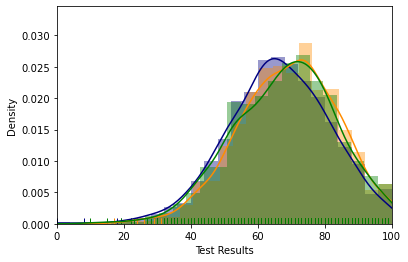

In [23]:
import seaborn as sns
sns.distplot(set1,color='navy', rug=True)
sns.distplot(set2,color='darkorange', rug=True)
sns.distplot(set3,color='green', rug=True)
plt.xlim(0,100)
plt.xlabel('Test Results')


####  It seems that all three samples have the same population means and it seems there is no significant difference between them at all. Let's set the null and alternative hypothesis:

> Ho: There is no difference in performance of students between math, reading and writing skills. <br>
Ha: There is a difference in performance of students between math, reading and writing skills. <br>

In [24]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(set1,set2)
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=441452.500, p-value at rejection =0.000
Probably different distributions


In [25]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(set1,set3)
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=461212.500, p-value at rejection =0.001
Probably different distributions


In [26]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(set2,set3)
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=480672.000, p-value at rejection =0.067
Probably the same distribution


In [27]:
from scipy.stats import kruskal
stat, p = kruskal(set1, set2, set3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Statistics=21.225, p=0.000
Probably different distributions


___

### Example: Website Design: A practical example of A/B Testing
*inspired by an example in __"A/B Test Significance in Python"__ by __Samuel Hinton__ available at* https://cosmiccoding.com.au/tutorials/ab_tests <br>
![](https://www.invespcro.com/blog/images/blog-images/ab-test-1-1.jpg) <br>
#### Imagine you’re in charge of a website (e.g., an online videogame shop). You have the current version of the website (aka. "A"), but aren’t happy with it. For instance, you are not selling as much as you like. You want to change the design of the "Add to Cart" button (aka. "B") and maybe that will increase your sells. <br>
![](https://www.volusion.com/blog/content/images/wp/buttonaandbuttonn.jpg) <br>

#### you set up your website so that half the people are directed to the old website, and half to one where you’ve made your change. You have data from both, and want to know, with confidence, “Does the change I made increase the sells?”.<br>

*This is an A/B test. Often this is used interchangably with the term “split testing”, though in general A/B tests test small changes, and split testing might be when you present two entirely different websites to the user.* <br>

#### Why not just change the website and monitor it for a week?
    Good question - by having two sites active at once and randomly directing users to one or the other, you control for all other variables. If one week later puts you the week before Christmas, this will impact sales, and you might draw the wrong conclusion because of these confounding effects.
#### Why is it not an A/B/C test?
    you can have as many perturbations running as you want, but got to keep the name simple. The more perturbations you try though, the smaller a number of samples you’ll have for each case, and the harder it will be to draw statistically significant conclusions.

#### Let us assume you have 1000 users, 550 were directed to site A, 450 to site B. In site A, 48 users made a purchase. In site B, 56 users made a purchase. Is this a statistically significant result?

In [28]:
num_a= 550
num_b = 450
click_a= 48
click_b = 56
rate_a= click_a / num_a
rate_b = click_b / num_b
print(rate_a)
print(rate_b)

0.08727272727272728
0.12444444444444444


#### You can click a button, or not. Two discrete options are available, so this is a textbook binomial distribution, with some unknown rate for site A and site B. We don’t know the true click rate, but we can estimate it using our small sample.

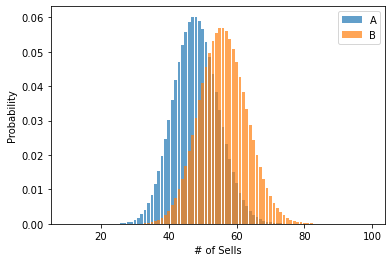

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Determine the probability of having x number of clicks - Binomial Dist.
clicks = np.arange(10, 100)
prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

# Make the bar plots.
plt.bar(clicks, prob_a, label="A", alpha=0.7)
plt.bar(clicks, prob_b, label="B", alpha=0.7)
plt.legend()
plt.xlabel("# of Sells"); plt.ylabel("Probability");

#### So we can see here that b has an edge, but its certaintly possible if we pick two random points according to the histograms for A and B, that A might actually be higher than B! <Br>
    
#### As we’re interested in the average # of sells, this averaging of an underlying distribution means our final estimate will be well approximated by a normal distribution. So let’s reformulate, using the normal approximation here:

Text(0, 0.5, 'Probability')

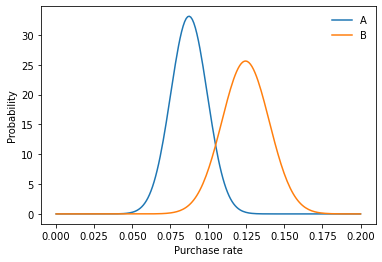

In [30]:
from scipy.stats import norm

# Where does this come from? See this link: https://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation
std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

click_rate = np.linspace(0, 0.2, 200)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

# Make the bar plots.
plt.plot(click_rate, prob_a, label="A")
plt.plot(click_rate, prob_b, label="B")
plt.legend(frameon=False)
plt.xlabel("Purchase rate"); plt.ylabel("Probability")

#### This is also a better plot than the first one, because we’ve removed the confusing effect of site A and site B having a slightly different number of visitors had. So our question is still the same: What is the chance that a draw from B is higher than a draw from A. Is it significant? <br>
#### To answer this, let us utilise the handy fact that the sum (or difference) of normally distributed random numbers is also a normal. This is simple - take the difference in the means and sum the variance. We’ll do two things below: First, get the z-score, and second, plot the proper distribution.



zscore is 1.890, with p-value 0.029


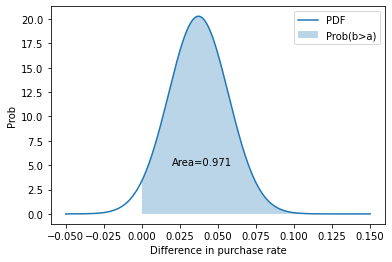

In [31]:
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in purchase rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

#### we can say that given the null hypothesis ("B is less than or equal to A") is true , we would expect to get this result or a result more extreme only 2.9% of the time. As that is a significant result (typically p < 5%), we reject the null hypothesis, and state that we have evidence that B > A. <br>
#### we’ve made a lot of plots for this to try and explain the concept. You can easily write a tiny function to simplify all of this. Whether you want the confidence or the p-value just means changing the final "norm.cdf" to "norm.sf".

In [32]:
def get_confidence_ab_test(click_a, num_a, click_b, num_b):
    rate_a = click_a / num_a
    rate_b = click_b / num_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return norm.sf(z_score)

print(get_confidence_ab_test(click_a, num_a, click_b, num_b))

0.029402650172421833


#### Remember Non-parametric Statistical Hypothesis Tests? We can use them here as well! <br>
#### Imagine we have the raw results of clicks (purchases), as 0s or 1s, as our distribution.

In [33]:
from scipy.stats import mannwhitneyu

a_dist = np.zeros(num_a)
a_dist[:click_a] = 1
b_dist = np.zeros(num_b)
b_dist[:click_b] = 1

stat, p_value = mannwhitneyu(a_dist, b_dist, alternative="less")
print(f"Mann-Whitney U test for null hypothesis B <= A is {p_value:0.3f}")

Mann-Whitney U test for null hypothesis B <= A is 0.028


___
![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>


__*Here are some great reads on this topic:*__ 
- __"Hypothesis testing in Machine learning using Python"__ by __Yogesh Agrawal__ available at *https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce* <br>
- __"Quick Guide To Perform Hypothesis Testing"__ available at *https://www.analyticsvidhya.com/blog/2020/12/quick-guide-to-perform-hypothesis-testing/*<br>
- __"A Gentle Introduction to Statistical Hypothesis Testing"__ by __Jason Brownlee__ available at *https://machinelearningmastery.com/statistical-hypothesis-tests/*<br>
- __"17 Statistical Hypothesis Tests in Python (Cheat Sheet)"__ by __Jason Brownlee__ available at *https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/*<br>
-  __"Implementing A/B Tests in Python"__ by __Robbie Geoghegan__ available at* https://medium.com/@robbiegeoghegan/implementing-a-b-tests-in-python-514e9eb5b3a1 <br>
-  __"The Math Behind A/B Testing with Example Python Code"__ by __Nguyen Ngo__ available at* https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f <br>
-  __"A/B Testing"__ available at* https://www.optimizely.com/optimization-glossary/ab-testing/ <br>
-  __"A/B Testing Guide"__ available at* https://vwo.com/ab-testing/ <br>

__*Some great videos:*__
-  __"What is A/B Testing? | Data Science in Minutes"__ by __Data Science Dojo__ available at* https://www.youtube.com/watch?v=zFMgpxG-chM <br>
-  __"A/B Testing Intro: Why, What, Where, & How to A/B Test"__ by __Testing Theory__ available at* https://www.youtube.com/watch?v=CH89jd4haRE <br>
-  __"A/B Testing"__ by __Udacity__ available at* https://www.youtube.com/watch?v=8H6QmMQWPEI <br>
- __"Statistical Hypothesis Testing- Data Science with Python"__ by __Technology for Noobs__ available at *https://www.youtube.com/watch?v=kd6zKBa9Rfk* <br>
- __"Hypothesis Testing, p-value & Confidence Intervals, Exploratory Data Analysis In Python Statistics"__ by __TheEngineeringWorld__ available at *https://www.youtube.com/watch?v=kz1IXqcFVCo* <br>
- __"Python Tutorial : Hypothesis tests"__ by __DataCamp__ available at *https://www.youtube.com/watch?v=6wbldEMpRXc* <br>

___
![](https://media.csesoc.org.au/content/images/2019/10/learn11.gif) <br>


## Exercise: Wait a minute ... Isn't The Kruskal-Wallis test missing something?  <br>

### We used the Kruskal-Wallis to check whether the three sets belong to the same distribution or at least one of them is different. The question is, how can we find the sets that are different? What is the missing piece in tests such as The Kruskal-Wallis Test?  

#### _Make sure to cite any resources that you may use._ 

<font color='green'> The Kuskal Wallis test can be used for continious and ordinary dependent variables although its not as powerful as other tests as is is non paramatric. </font> <br>
<font color='green'> Explain here... </font> <br>
<font color='green'> Explain here... </font> <br>

![](http://img.picturequotes.com/2/124/123499/one-finds-the-truth-by-making-a-hypothesis-and-comparing-observations-with-the-hypothesis-quote-1.jpg)